<a href="https://colab.research.google.com/github/mabdullah-imran/CycleGAN-image-style-transfer/blob/main/CycleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

# Install

In [17]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2516/2516), 8.20 MiB | 16.37 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [2]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 68.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.4 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408195 sha

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, summer2winter_yosemite, horse2zebra, monet2photo, cezanne2photo, ukiyoe2photo, vangogh2photo, maps, cityscapes, facades, iphone2dslr_flower, ae_photos]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [4]:
!bash ./datasets/download_cyclegan_dataset.sh facades

Specified [facades]
for details.

--2025-05-11 06:00:49--  http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/facades.zip
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35135868 (34M) [application/zip]
Saving to: ‘./datasets/facades.zip’

./datasets/facades. 100%[===================>]  33.51M   979KB/s    in 49s     

2025-05-11 06:01:39 (695 KB/s) - ‘./datasets/facades.zip’ saved [35135868/35135868]

Archive:  ./datasets/facades.zip
   creating: ./datasets/facades/trainA/
  inflating: ./datasets/facades/trainA/110_A.jpg  
  inflating: ./datasets/facades/trainA/324_A.jpg  
  inflating: ./datasets/facades/trainA/353_A.jpg  
  inflating: ./datasets/facades/trainA/319_A.jpg  
  inflating: ./datasets/facades/trainA/20_A.jpg  
  inflating: ./datasets/facades/trainA/274_A.jpg  
  inflating: ./d

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [5]:
!bash ./scripts/download_cyclegan_model.sh style_monet

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [style_monet]
for details.

--2025-05-11 06:01:39--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_monet.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/style_monet_pretrained/latest_net_G.pth’

./checkpoints/style 100%[===================>]  43.46M  12.8MB/s    in 4.2s    

2025-05-11 06:01:44 (10.3 MB/s) - ‘./checkpoints/style_monet_pretrained/latest_net_G.pth’ saved [45575747/45575747]



# Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [ ]:
!python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan --display_id -1

# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [6]:
!python test.py --dataroot datasets/facades/testA --name style_monet_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/facades/testA        	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

# Visualize

In [12]:
!ls ./results/style_monet_pretrained/test_latest/images

100_fake.png  11_real.png  1_fake.png	27_real.png  35_fake.png  42_real.png
100_real.png  12_fake.png  1_real.png	28_fake.png  35_real.png  43_fake.png
101_fake.png  12_real.png  20_fake.png	28_real.png  36_fake.png  43_real.png
101_real.png  13_fake.png  20_real.png	29_fake.png  36_real.png  44_fake.png
102_fake.png  13_real.png  21_fake.png	29_real.png  37_fake.png  44_real.png
102_real.png  14_fake.png  21_real.png	2_fake.png   37_real.png  45_fake.png
103_fake.png  14_real.png  22_fake.png	2_real.png   38_fake.png  45_real.png
103_real.png  15_fake.png  22_real.png	30_fake.png  38_real.png  46_fake.png
104_fake.png  15_real.png  23_fake.png	30_real.png  39_fake.png  46_real.png
104_real.png  16_fake.png  23_real.png	31_fake.png  39_real.png  47_fake.png
105_fake.png  16_real.png  24_fake.png	31_real.png  3_fake.png   47_real.png
105_real.png  17_fake.png  24_real.png	32_fake.png  3_real.png   48_fake.png
106_fake.png  17_real.png  25_fake.png	32_real.png  40_fake.png  48_real.png
1

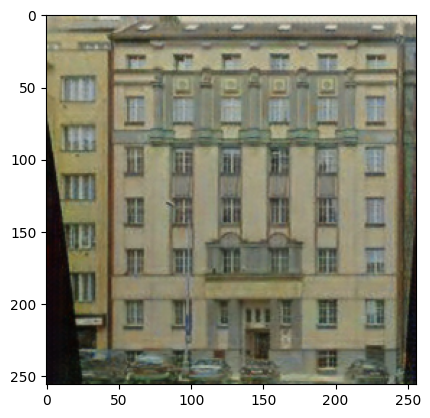

In [15]:
import matplotlib.pyplot as plt

img = plt.imread('./results/style_monet_pretrained/test_latest/images/1_fake.png')
plt.imshow(img)

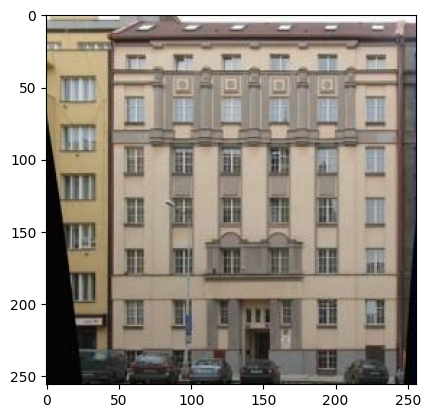

In [16]:
import matplotlib.pyplot as plt

img = plt.imread('./results/style_monet_pretrained/test_latest/images/1_real.png')
plt.imshow(img)